In [46]:
import numpy as np
import matplotlib.pyplot as plt

from math import cos, sin, pi

# Aufgabe 2

## a) 50 Punkte auf Kreis mit Noise

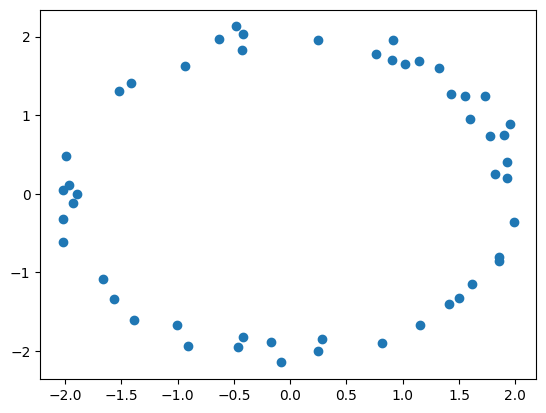

In [121]:

def create_circle_samples(n, r, noise_var):
    np.random.seed(42)
    samples = []
    
    for _ in range(50):
        phi = np.random.random() * 2.0 * pi
        e = np.random.normal(0, noise_var ** 0.5) # gaussian noise
        x =  r * cos(phi) + e
        y = r * sin(phi) + e
        samples.append(np.array([x, y]))
    assert len(samples) == n
    return samples

xy = create_circle_samples(n=50, r=2.0, noise_var=0.01)

def plot_dots(xy: list):
    x = [x for x, _ in xy]
    y = [y for _, y in xy]
    plt.scatter(x, y)
    plt.show()
    
plot_dots(xy)

# b) Gradient of E

In [122]:
def sqrt(n):
    return n ** 0.5

def gradient_e(mx, my, rad):
    x = np.array([x for x, _ in xy])
    y = np.array([y for _, y in xy])
    residii = sqrt(2) * (sqrt((x - mx)**2  + (y - my)**2) - rad)

    gdrx = - sqrt(2) * (x - mx) / sqrt((x - mx)**2 + (y - my)**2)
    gdry =  - sqrt(2) * (y - my) / sqrt((x - mx)**2 + (y - my)**2)
    gdrrad = - np.ones(len(x)) * sqrt(2)
    
    J = np.array([gdrx, gdry, gdrrad]).T    
    return J.T@residii

print(gradient_e(0.0, 0.0, 2.0))
print(gradient_e(0.5, 0.1, .9))

[ 0.42989939  0.16114798 -0.23978444]
[  28.66719151    5.65261675 -108.24146899]


# c) Gradient descent

In [123]:
def descent_gradiently(mx, my, r, iterations, dstep) -> tuple[float, float]:
    for i in range(iterations):
        gd = gradient_e(mx, my, r)
        
        d = -gd / np.linalg.norm(gd)
        assert (d @ gd.T) < 0, "Expected negative scalar, received " + (d @ gd)
        assert np.isclose(np.linalg.norm(d), 1), np.linalg.norm(d)
        
        dxyr = d * dstep
        xyr_new = np.array([mx, my, r]) + dxyr
        
        mx, my, r = xyr_new
    return mx, my, r

descent_gradiently(mx=0.5, my=0.1, r=0.9, iterations=10000, dstep=0.001)

(np.float64(-0.008773807470549481),
 np.float64(-0.002266664006192797),
 np.float64(2.0038919824434176))

In [125]:
from commons import crosstest

def descent_gd_e_wrapped(iterations, dstep):
    mx = 0.5
    my = 0.1
    r = 0.9
    mx, my, r = descent_gradiently(mx, my, r, iterations, dstep)
    print(f"{iterations=:>7}\t{dstep=:7}\tx=({mx:>7.3f}, {my:>7.3f}, {r:>7.3f})")
    
print("Gradient descent E")
crosstest(descent_gd_e_wrapped, [10, 100, 1000, 10000], [10, 5, 3, 1, 0.1, 0.01, 0.001, 0.0001])

Gradient descent E
iterations=     10	dstep=     10	x=(  9.694,   0.584,  -1.052)
iterations=     10	dstep=      5	x=( -0.889,  -0.358,  -1.694)
iterations=     10	dstep=      3	x=( -0.146,   0.005,   0.580)
iterations=     10	dstep=      1	x=(  0.109,   0.049,   2.538)
iterations=     10	dstep=    0.1	x=(  0.189,   0.028,   1.845)
iterations=     10	dstep=   0.01	x=(  0.474,   0.095,   0.996)
iterations=     10	dstep=  0.001	x=(  0.497,   0.099,   0.910)
iterations=     10	dstep= 0.0001	x=(  0.500,   0.100,   0.901)
iterations=    100	dstep=     10	x=(  0.657,  -0.333,   1.876)
iterations=    100	dstep=      5	x=( -1.046,  -0.847,  -1.524)
iterations=    100	dstep=      3	x=( -0.065,  -0.062,   0.561)
iterations=    100	dstep=      1	x=(  0.109,   0.048,   2.538)
iterations=    100	dstep=    0.1	x=(  0.003,   0.003,   2.063)
iterations=    100	dstep=   0.01	x=(  0.182,   0.026,   1.842)
iterations=    100	dstep=  0.001	x=(  0.474,   0.095,   0.996)
iterations=    100	dstep= 0.0001	x=(